### IMPORTS

In [142]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import linear_model
import pandas as pd
import numpy as np

# Histograma

## Dataset

In [97]:
X = np.array([0, 5, 2, 1, 5, 3, 4, 0, 5, 5])

### Média

In [98]:
mean = np.mean(X)
mean

3.0

### Variância

In [99]:
variance = np.var(X)
variance

4.0

### Desvio Padrão

In [100]:
std = np.std(X)
std

2.0

### Histograma

(array([ 2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  4.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

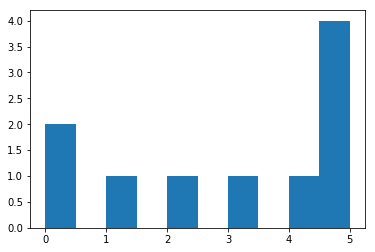

In [101]:
plt.hist(X)

## Histograma de uma distribuição normal Randomica

In [110]:
hr = np.random.normal(loc=60, scale=10, size=5000)

### Media

In [111]:
hr.mean()

60.000953859427106

### Desvio Padrao

In [128]:
hr.std()

10.025778185210493

### Histograma

(array([   1.,    0.,    0.,    1.,    0.,    1.,    2.,    4.,    3.,
           8.,    8.,   20.,   27.,   40.,   42.,   57.,   79.,  106.,
         147.,  160.,  190.,  216.,  240.,  247.,  306.,  287.,  328.,
         315.,  301.,  298.,  247.,  213.,  240.,  198.,  141.,  133.,
         109.,   79.,   60.,   31.,   44.,   17.,   15.,   12.,    7.,
           4.,    9.,    4.,    1.,    2.]),
 array([ 18.05235792,  19.60873001,  21.16510211,  22.7214742 ,
         24.2778463 ,  25.83421839,  27.39059049,  28.94696258,
         30.50333468,  32.05970677,  33.61607887,  35.17245096,
         36.72882305,  38.28519515,  39.84156724,  41.39793934,
         42.95431143,  44.51068353,  46.06705562,  47.62342772,
         49.17979981,  50.73617191,  52.292544  ,  53.8489161 ,
         55.40528819,  56.96166029,  58.51803238,  60.07440448,
         61.63077657,  63.18714867,  64.74352076,  66.29989286,
         67.85626495,  69.41263705,  70.96900914,  72.52538123,
         74.08175333,  7

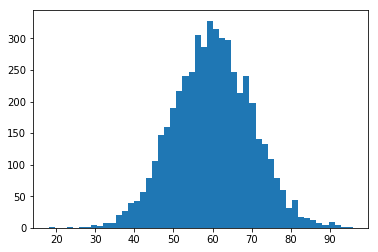

In [130]:
plt.hist(hr, bins=50)

## Histograma - Outras variações

### Exponencial

In [116]:
exp = np.random.exponential(size=10000)

(array([ 796.,  687.,  661.,  579.,  566.,  492.,  441.,  443.,  395.,
         388.,  355.,  310.,  273.,  230.,  242.,  242.,  229.,  208.,
         188.,  166.,  145.,  147.,  136.,  128.,  111.,  131.,   89.,
          93.,   98.,   81.,   67.,   66.,   66.,   50.,   43.,   47.,
          36.,   31.,   41.,   33.,   28.,   32.,   29.,   28.,   24.,
          38.,   20.,   22.,   27.,   14.,   16.,   11.,   11.,   11.,
          17.,   10.,   14.,    7.,   11.,    9.,    5.,    5.,   10.,
           3.,    8.,    9.,    4.,    4.,    6.,    2.,    0.,    3.,
           4.,    0.,    6.,    2.,    1.,    0.,    0.,    1.,    1.,
           2.,    5.,    1.,    1.,    1.,    0.,    1.,    0.,    2.,
           0.,    1.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  2.94765484e-05,   7.83187492e-02,   1.56608022e-01,
          2.34897295e-01,   3.13186567e-01,   3.91475840e-01,
          4.69765113e-01,   5.48054385e-01,   6.26343658e-01,
          7.04632931e-01

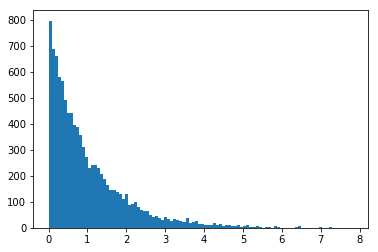

In [119]:
plt.hist(exp, bins=100)

### Poisson

In [138]:
ps = np.random.poisson(size=10000)

(array([ 3734.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         3688.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         1825.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   565.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   157.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    25.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     6.]),
 array([ 0.  ,  0.12,  0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,
         1.08,  1.2 ,  1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,
         2.16,  2.28,  2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  ,  3.12,
         3.24,  3.36,  3.48,  3.6 ,  3.72,  3.84,  3.96,  4.08,  4.2 ,
         4.32,  4.44,  4.56,  4.68,  4.8 ,  4.92,  5.04,  5.16,  5.28,
         5.4 ,  5.52,  5.64,  5.76,  5.88,  6.  ]),
 <a list of 50 Patch objects>)

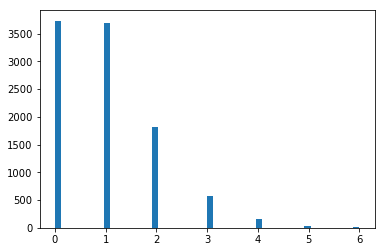

In [141]:
plt.hist(ps, bins=50)

# Gradiente Descendente

In [150]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    err = compute_error_for_line_given_points(b0, b1, x, y)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, err))
    return err

### Load dataset

In [151]:
points = np.genfromtxt("data.csv", delimiter=",")

In [152]:
points.shape

(100, 2)

### Execução 

#### Grandiente Descendente

In [170]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 1000000
error = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 1000000 iterações, obtemos b0 = 7.986822773189424, b1 = 1.3225135372757006, error = 110.25738413161345
CPU times: user 29 s, sys: 0 ns, total: 29 s
Wall time: 29 s


#### Linear Regression

In [173]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
err = compute_error_for_line_given_points(b0, b1, x, y)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, err))

b0 = 7.991020982270399, b1 = [ 1.32243102], error = 110.25738346621316
CPU times: user 6.4 ms, sys: 31 µs, total: 6.43 ms
Wall time: 3.56 ms


### Diferenca entre as margens de erro

In [176]:
diff = abs(error - err) < 0.01
diff

True

### O que ocorre quando aumenta a taxa de aprendizagem

In [185]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 100000
error = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...


/home/unknown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Após 100000 iterações, obtemos b0 = nan, b1 = nan, error = nan
CPU times: user 3.02 s, sys: 10 µs, total: 3.02 s
Wall time: 3.03 s


Bom, ocorre um overflow.

### Num iterações para 0.01 de Learning Rate

In [218]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
MAX_ITERATIONS = 90
num_iterations = 1
error = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 1 iterações, obtemos b0 = 1.4547010110737293, b1 = 73.70702973591055, error = 13005291.973556831
CPU times: user 760 µs, sys: 8 µs, total: 768 µs
Wall time: 643 µs


## Predição do valor de casas

### Dataset

In [247]:
casas = pd.DataFrame([
    [1400, 245000],
    [1600, 312000],
    [1700, 279000],
    [1875, 308000],
    [1100, 199000],
    [1550, 219000],
    [2350, 405000],
    [2450, 324000],
    [1425, 319000],
    [1700, 255000],
], columns=['Casa sq.ft(X)', 'Price Y'])

casas

,Casa sq.ft(X),Price Y
0,1400,245000
1,1600,312000
2,1700,279000
3,1875,308000
4,1100,199000
5,1550,219000
6,2350,405000
7,2450,324000
8,1425,319000
9,1700,255000


In [248]:
# Convert pés quadrados a metros quadrados
def m2(ft): return ft / 10.764

In [249]:
Xc = m2(np.array(casas)[:,0])
yc = np.array(casas)[:,1]
print (Xc)
print (yc)

[ 130.06317354  148.6436269   157.93385359  174.19175028  102.1924935
  143.99851356  218.32032702  227.6105537   132.38573021  157.93385359]
[245000 312000 279000 308000 199000 219000 405000 324000 319000 255000]


In [268]:
%%time
learning_rate = 0.00001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 1000000
error = run(Xc, yc, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 85342300000.0
Executando...
Após 1000000 iterações, obtemos b0 = 62624.176018587714, b1 = 1393.7906695233057, error = 1430924448.291332
CPU times: user 26.9 s, sys: 240 ms, total: 27.2 s
Wall time: 27 s


In [269]:
model = linear_model.LinearRegression()

In [272]:
Xcc = [ [i] for i in Xc ]
model.fit(Xcc, yc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [281]:
model.coef_, model.intercept_

(array([ 1181.53993]), 98248.329621380806)

In [278]:
y_pred = model.predict([[100]])
y_pred

array([ 216402.3226217])

In [280]:
print (y_pred[0])

216402.322622
